In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import re

In [2]:
submit=pd.read_csv('submit.csv')

In [3]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [4]:
submit.shape

(5200, 2)

In [5]:
test=pd.read_csv('test.csv')

In [6]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [7]:
test.shape

(5200, 4)

In [8]:
df=pd.read_csv('train.csv')

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
df['text']=df['text'].astype(str)

In [12]:
df['news length']=df['text'].apply(len)

<Axes: xlabel='news length', ylabel='Count'>

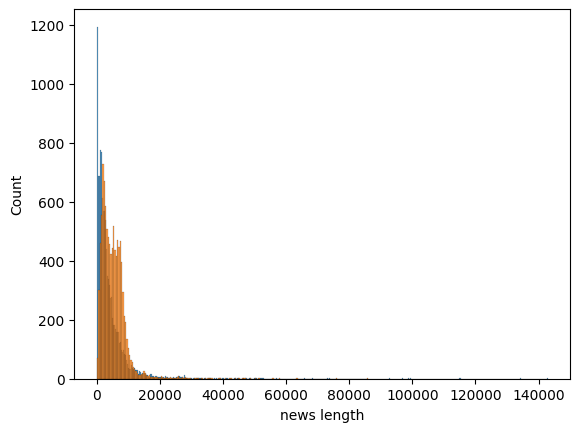

In [13]:
sns.histplot(df[df['label']==1]['news length'])
sns.histplot(df[df['label']==0]['news length'])

In [14]:
flit=df['label']==1
List=set(df.loc[flit,'author'].unique())

In [15]:
List_1=set(df.loc[-flit,'author'].unique())

In [16]:
z=List.intersection(List_1)

In [17]:
z

{'AFP', 'Ann Coulter', 'Pam Key', 'Pamela Geller', 'Reuters', nan}

In [18]:
df[df['label']==0]['author']

1                                  Daniel J. Flynn
5                                  Daniel Nussbaum
7                                  Alissa J. Rubin
8                                              NaN
9                     Megan Twohey and Scott Shane
                           ...                    
20792                                 John Hayward
20794                                Lee Stranahan
20795                                Jerome Hudson
20796                             Benjamin Hoffman
20797    Michael J. de la Merced and Rachel Abrams
Name: author, Length: 10387, dtype: object

In [19]:
from wordcloud import WordCloud
wc=WordCloud()

In [20]:
real=wc.generate(df[df['label']==0]['author'].str.cat(sep=' '))

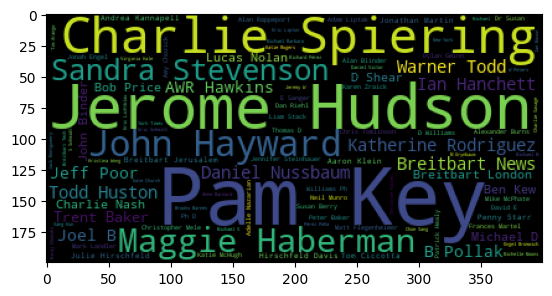

In [21]:
plt.imshow(real)

In [22]:
fake=wc.generate(df[df['label']==1]['author'].str.cat(sep=' '))

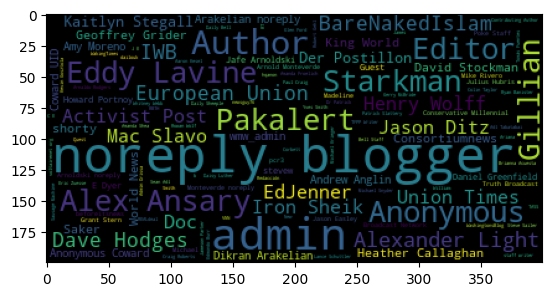

In [23]:
plt.imshow(fake)

In [24]:
df=df.fillna('')

In [25]:
df.isna().sum()

title          0
author         0
text           0
label          0
news length    0
dtype: int64

In [26]:
import nltk

In [27]:
df['contents']=df['title']+' '+df['author']
df['contents']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: contents, Length: 20800, dtype: object

In [28]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [29]:
from nltk.corpus import stopwords
List=stopwords.words('english')

In [30]:
def transformer(text):
    text=re.sub('[^a-zA-Z]',' ',text)#replacing non alphabetic by space
    text=text.lower()
    text=text.split()
    y=[]
    for word in text :
        #print(word)
        if word not in List:
            y.append(ps.stem(word))
    return ' '.join(y)        

In [31]:
df['contents']=df['contents'].apply(transformer)

In [32]:
df['contents'][0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu'

In [33]:
df.head()

,title,author,text,label,news length,contents
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,hous dem aid even see comey letter jason chaff...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,flynn hillari clinton big woman campu breitbar...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,truth might get fire consortiumnew com
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,civilian kill singl us airstrik identifi jessi...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,iranian woman jail fiction unpublish stori wom...


In [34]:
x=df['contents'].values
y=df['label'].values

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=9000)
x=vectorizer.fit_transform(x).toarray()

In [36]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=classifier.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)


0.9790865384615385

In [41]:
x=df['contents'].values
y=df['label'].values

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(max_features=9000)
x=vectorizer.fit_transform(x).toarray()

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=classifier.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9884615384615385

In [61]:
x=df['contents'].values
y=df['label'].values

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(max_features=9000)
x=vectorizer.fit_transform(x).toarray()

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
a=3
a

3

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier_2=RandomForestClassifier(n_estimators=10)
classifier_2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [69]:
y_pred=classifier_2.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)


0.9875

In [ ]:
from sklearn.svm import SVC
classifier_3=SVC(kernel='rbf')
classifier_3.fit(x_train,y_train)